<a href="https://colab.research.google.com/github/Mahak0602/Nexthikes-Project-6/blob/main/Nexthikes_project_6%20notebook-1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [69]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_regression

In [70]:
import warnings
warnings.filterwarnings('ignore')

# Data impprting

In [72]:
import pandas as pd

df1 = pd.read_csv("/content/store data.csv")
df2 = pd.read_csv("/content/test dataset.csv")
df3 = pd.read_csv("/content/train dataset.csv")

# Here all 3 datasets has been uploaded.

# Preprocess all 3 datasets.

In [73]:
df1.isnull().sum()

,0
Store,0
StoreType,0
Assortment,0
CompetitionDistance,3
CompetitionOpenSinceMonth,354
CompetitionOpenSinceYear,354
Promo2,0
Promo2SinceWeek,544
Promo2SinceYear,544
PromoInterval,544


In [74]:
df1['CompetitionDistance'].fillna(df1['CompetitionDistance'].median(), inplace=True)
df1['CompetitionOpenSinceMonth'].fillna(0, inplace=True)
df1['CompetitionOpenSinceYear'].fillna(0, inplace=True)
df1['CompetitionOpen'] = ((df1['CompetitionOpenSinceMonth'] > 0) &
                         (df1['CompetitionOpenSinceYear'] > 0)).astype(int)
df1.loc[df1['Promo2'] == 0, ['Promo2SinceWeek', 'Promo2SinceYear']] = 0
df1.loc[df1['Promo2'] == 0, 'PromoInterval'] = 'None'

In [75]:
df1.isnull().sum()

,0
Store,0
StoreType,0
Assortment,0
CompetitionDistance,0
CompetitionOpenSinceMonth,0
CompetitionOpenSinceYear,0
Promo2,0
Promo2SinceWeek,0
Promo2SinceYear,0
PromoInterval,0


In [76]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1115 non-null   float64
 4   CompetitionOpenSinceMonth  1115 non-null   float64
 5   CompetitionOpenSinceYear   1115 non-null   float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            1115 non-null   float64
 8   Promo2SinceYear            1115 non-null   float64
 9   PromoInterval              1115 non-null   object 
 10  CompetitionOpen            1115 non-null   int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 95.9+ KB


In [77]:
cols_to_int = ['CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear',
               'Promo2SinceWeek', 'Promo2SinceYear']
df1[cols_to_int] = df1[cols_to_int].astype(int)
cat_cols = ['StoreType', 'Assortment', 'PromoInterval']
df1[cat_cols] = df1[cat_cols].astype('category')


In [78]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   Store                      1115 non-null   int64   
 1   StoreType                  1115 non-null   category
 2   Assortment                 1115 non-null   category
 3   CompetitionDistance        1115 non-null   float64 
 4   CompetitionOpenSinceMonth  1115 non-null   int64   
 5   CompetitionOpenSinceYear   1115 non-null   int64   
 6   Promo2                     1115 non-null   int64   
 7   Promo2SinceWeek            1115 non-null   int64   
 8   Promo2SinceYear            1115 non-null   int64   
 9   PromoInterval              1115 non-null   category
 10  CompetitionOpen            1115 non-null   int64   
dtypes: category(3), float64(1), int64(7)
memory usage: 73.6 KB


In [79]:
df2

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,7/31/2015,5263,555,1,1,0,1
1,2,5,7/31/2015,6064,625,1,1,0,1
2,3,5,7/31/2015,8314,821,1,1,0,1
3,4,5,7/31/2015,13995,1498,1,1,0,1
4,5,5,7/31/2015,4822,559,1,1,0,1
...,...,...,...,...,...,...,...,...,...
1017204,1111,2,1/1/2013,0,0,0,0,a,1
1017205,1112,2,1/1/2013,0,0,0,0,a,1
1017206,1113,2,1/1/2013,0,0,0,0,a,1
1017207,1114,2,1/1/2013,0,0,0,0,a,1


In [80]:
df2.isnull().sum()

,0
Store,0
DayOfWeek,0
Date,0
Sales,0
Customers,0
Open,0
Promo,0
StateHoliday,0
SchoolHoliday,0


In [82]:
df2.isnull().sum()

,0
Store,0
DayOfWeek,0
Date,0
Sales,0
Customers,0
Open,0
Promo,0
StateHoliday,0
SchoolHoliday,0


In [83]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB


In [93]:
df['StateHoliday'] = df['StateHoliday'].astype(str).replace({'0': 'None', 'a': 'PublicHoliday', 'b': 'EasterHoliday', 'c': 'Christmas'})
df['Open'] = df['Open'].fillna(1).astype(int)
df['Promo'] = df['Promo'].astype(int)
df = df[df['Open'] == 1]

In [94]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype         
---  ------         --------------    -----         
 0   Store          1017209 non-null  int64         
 1   DayOfWeek      1017209 non-null  int64         
 2   Date           1017209 non-null  datetime64[ns]
 3   Sales          1017209 non-null  int64         
 4   Customers      1017209 non-null  int64         
 5   Open           1017209 non-null  int64         
 6   Promo          1017209 non-null  int64         
 7   StateHoliday   1017209 non-null  category      
 8   SchoolHoliday  1017209 non-null  int64         
dtypes: category(1), datetime64[ns](1), int64(7)
memory usage: 63.1 MB


In [95]:
df3

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday
0,1,1,4,2015-09-17,1,1,0,0
1,2,3,4,2015-09-17,1,1,0,0
2,3,7,4,2015-09-17,1,1,0,0
3,4,8,4,2015-09-17,1,1,0,0
4,5,9,4,2015-09-17,1,1,0,0
...,...,...,...,...,...,...,...,...
41083,41084,1111,6,2015-08-01,1,0,0,0
41084,41085,1112,6,2015-08-01,1,0,0,0
41085,41086,1113,6,2015-08-01,1,0,0,0
41086,41087,1114,6,2015-08-01,1,0,0,0


In [96]:
df3.isnull().sum()

,0
Id,0
Store,0
DayOfWeek,0
Date,0
Open,11
Promo,0
StateHoliday,0
SchoolHoliday,0


In [97]:
# Clean 'StateHoliday' values
df3['StateHoliday'] = df3['StateHoliday'].astype(str).replace({
    '0': 'None', 'a': 'PublicHoliday', 'b': 'EasterHoliday', 'c': 'Christmas'
})

# Fill missing values and convert types
df3['Open'] = df3['Open'].fillna(1).astype(int)
df3['Promo'] = df3['Promo'].astype(int)

# Create date-related features
df3['Year'] = df3['Date'].dt.year
df3['Month'] = df3['Date'].dt.month
df3['Day'] = df3['Date'].dt.day
df3['DayOfYear'] = df3['Date'].dt.dayofyear
df3['WeekOfYear'] = df3['Date'].dt.isocalendar().week.astype(int)
df3['Quarter'] = df3['Date'].dt.quarter
df3['Weekday'] = df3['Date'].dt.weekday
df3['IsWeekend'] = df3['Weekday'].isin([5, 6]).astype(int)

# One-hot encode 'StateHoliday'
df3 = pd.get_dummies(df3, columns=["StateHoliday"], drop_first=True)

# Sort by Store and Date
df3 = df3.sort_values(['Store', 'Date']).reset_index(drop=True)

# Drop Id column if present (optional)
df3 = df3.drop(columns=["Id"], errors="ignore")

# Final check
print(df3.head())
print(df3.shape)

   Store  DayOfWeek       Date  Open  Promo  SchoolHoliday  Year  Month  Day  \
0      1          6 2015-08-01     1      0              1  2015      8    1   
1      1          7 2015-08-02     0      0              1  2015      8    2   
2      1          1 2015-08-03     1      1              1  2015      8    3   
3      1          2 2015-08-04     1      1              1  2015      8    4   
4      1          3 2015-08-05     1      1              1  2015      8    5   

   DayOfYear  WeekOfYear  Quarter  Weekday  IsWeekend  \
0        213          31        3        5          1   
1        214          31        3        6          1   
2        215          32        3        0          0   
3        216          32        3        1          0   
4        217          32        3        2          0   

   StateHoliday_PublicHoliday  
0                       False  
1                       False  
2                       False  
3                       False  
4               

In [98]:
df3.isnull().sum()

,0
Store,0
DayOfWeek,0
Date,0
Open,0
Promo,0
SchoolHoliday,0
Year,0
Month,0
Day,0
DayOfYear,0


In [99]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41088 entries, 0 to 41087
Data columns (total 15 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   Store                       41088 non-null  int64         
 1   DayOfWeek                   41088 non-null  int64         
 2   Date                        41088 non-null  datetime64[ns]
 3   Open                        41088 non-null  int64         
 4   Promo                       41088 non-null  int64         
 5   SchoolHoliday               41088 non-null  Int64         
 6   Year                        41088 non-null  int32         
 7   Month                       41088 non-null  int32         
 8   Day                         41088 non-null  int32         
 9   DayOfYear                   41088 non-null  int32         
 10  WeekOfYear                  41088 non-null  int64         
 11  Quarter                     41088 non-null  int32     

# Here i merged store dataset with train dataset.

In [100]:
df4 = pd.merge(df3, df1, on='Store', how='left')

In [101]:
df4

,Store,DayOfWeek,Date,Open,Promo,SchoolHoliday,Year,Month,Day,DayOfYear,...,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,CompetitionOpen
0,1,6,2015-08-01,1,0,1,2015,8,1,213,...,c,a,1270.0,9,2008,0,0,0,None,1
1,1,7,2015-08-02,0,0,1,2015,8,2,214,...,c,a,1270.0,9,2008,0,0,0,None,1
2,1,1,2015-08-03,1,1,1,2015,8,3,215,...,c,a,1270.0,9,2008,0,0,0,None,1
3,1,2,2015-08-04,1,1,1,2015,8,4,216,...,c,a,1270.0,9,2008,0,0,0,None,1
4,1,3,2015-08-05,1,1,1,2015,8,5,217,...,c,a,1270.0,9,2008,0,0,0,None,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41083,1115,7,2015-09-13,0,0,0,2015,9,13,256,...,d,c,5350.0,0,0,1,22,2012,"Mar,Jun,Sept,Dec",0
41084,1115,1,2015-09-14,1,1,0,2015,9,14,257,...,d,c,5350.0,0,0,1,22,2012,"Mar,Jun,Sept,Dec",0
41085,1115,2,2015-09-15,1,1,0,2015,9,15,258,...,d,c,5350.0,0,0,1,22,2012,"Mar,Jun,Sept,Dec",0
41086,1115,3,2015-09-16,1,1,0,2015,9,16,259,...,d,c,5350.0,0,0,1,22,2012,"Mar,Jun,Sept,Dec",0


# Here i merged store dataset with test dataset.

In [102]:
df5 =pd.merge(df2, df1, on='Store', how='left')

In [103]:
df5

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,CompetitionOpen
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9,2008,0,0,0,None,1
1,2,5,2015-07-31,6064,625,1,1,0,1,a,a,570.0,11,2007,1,13,2010,"Jan,Apr,Jul,Oct",1
2,3,5,2015-07-31,8314,821,1,1,0,1,a,a,14130.0,12,2006,1,14,2011,"Jan,Apr,Jul,Oct",1
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,c,620.0,9,2009,0,0,0,None,1
4,5,5,2015-07-31,4822,559,1,1,0,1,a,a,29910.0,4,2015,0,0,0,None,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017204,1111,2,2013-01-01,0,0,0,0,a,1,a,a,1900.0,6,2014,1,31,2013,"Jan,Apr,Jul,Oct",1
1017205,1112,2,2013-01-01,0,0,0,0,a,1,c,c,1880.0,4,2006,0,0,0,None,1
1017206,1113,2,2013-01-01,0,0,0,0,a,1,a,c,9260.0,0,0,0,0,0,None,0
1017207,1114,2,2013-01-01,0,0,0,0,a,1,a,c,870.0,0,0,0,0,0,None,0


# **PREPROCESSING DATASETS DF4**

In [28]:
df4

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,CompetitionOpen
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9,2008,0,0,0,None,1
1,2,5,2015-07-31,6064,625,1,1,0,1,a,a,570.0,11,2007,1,13,2010,"Jan,Apr,Jul,Oct",1
2,3,5,2015-07-31,8314,821,1,1,0,1,a,a,14130.0,12,2006,1,14,2011,"Jan,Apr,Jul,Oct",1
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,c,620.0,9,2009,0,0,0,None,1
4,5,5,2015-07-31,4822,559,1,1,0,1,a,a,29910.0,4,2015,0,0,0,None,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017204,1111,2,2013-01-01,0,0,0,0,a,1,a,a,1900.0,6,2014,1,31,2013,"Jan,Apr,Jul,Oct",1
1017205,1112,2,2013-01-01,0,0,0,0,a,1,c,c,1880.0,4,2006,0,0,0,None,1
1017206,1113,2,2013-01-01,0,0,0,0,a,1,a,c,9260.0,0,0,0,0,0,None,0
1017207,1114,2,2013-01-01,0,0,0,0,a,1,a,c,870.0,0,0,0,0,0,None,0


In [104]:
df4.isnull().sum()

,0
Store,0
DayOfWeek,0
Date,0
Open,0
Promo,0
SchoolHoliday,0
Year,0
Month,0
Day,0
DayOfYear,0


# remove unnessary columns

In [111]:
columns_to_drop = [
    'Date',
    'PromoInterval',
    'CompetitionOpenSinceMonth',
    'CompetitionOpenSinceYear',
    'Promo2SinceWeek',
    'Promo2SinceYear',
    'CompetitionOpen'
]

# Drop only columns that exist in df3
df4.drop(columns=columns_to_drop, errors='ignore', inplace=True)


# all null values has been handled.

In [112]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41088 entries, 0 to 41087
Data columns (total 18 columns):
 #   Column                      Non-Null Count  Dtype   
---  ------                      --------------  -----   
 0   Store                       41088 non-null  int64   
 1   DayOfWeek                   41088 non-null  int64   
 2   Open                        41088 non-null  int64   
 3   Promo                       41088 non-null  int64   
 4   SchoolHoliday               41088 non-null  Int64   
 5   Year                        41088 non-null  int32   
 6   Month                       41088 non-null  int32   
 7   Day                         41088 non-null  int32   
 8   DayOfYear                   41088 non-null  int32   
 9   WeekOfYear                  41088 non-null  int64   
 10  Quarter                     41088 non-null  int32   
 11  Weekday                     41088 non-null  int32   
 12  IsWeekend                   41088 non-null  int64   
 13  StateHoliday_Pub

In [114]:
# 1. Convert nullable Int64 to standard int
df4['SchoolHoliday'] = df4['SchoolHoliday'].astype(int)

# 2. Convert boolean to integer (0/1)
df4['StateHoliday_PublicHoliday'] = df4['StateHoliday_PublicHoliday'].astype(int)

# 3. One-hot encode categorical variables
df4 = pd.get_dummies(df4, columns=['StoreType', 'Assortment'], drop_first=True)

In [115]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41088 entries, 0 to 41087
Data columns (total 21 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Store                       41088 non-null  int64  
 1   DayOfWeek                   41088 non-null  int64  
 2   Open                        41088 non-null  int64  
 3   Promo                       41088 non-null  int64  
 4   SchoolHoliday               41088 non-null  int64  
 5   Year                        41088 non-null  int32  
 6   Month                       41088 non-null  int32  
 7   Day                         41088 non-null  int32  
 8   DayOfYear                   41088 non-null  int32  
 9   WeekOfYear                  41088 non-null  int64  
 10  Quarter                     41088 non-null  int32  
 11  Weekday                     41088 non-null  int32  
 12  IsWeekend                   41088 non-null  int64  
 13  StateHoliday_PublicHoliday  410

# Then i correct the wrong dtypes.

In [116]:
# Drop duplicate rows
df4 = df4.drop_duplicates()

# Confirm removal
print(f"New shape after removing duplicates: {df4.shape}")


New shape after removing duplicates: (41088, 21)


# Box plot to check outliers.

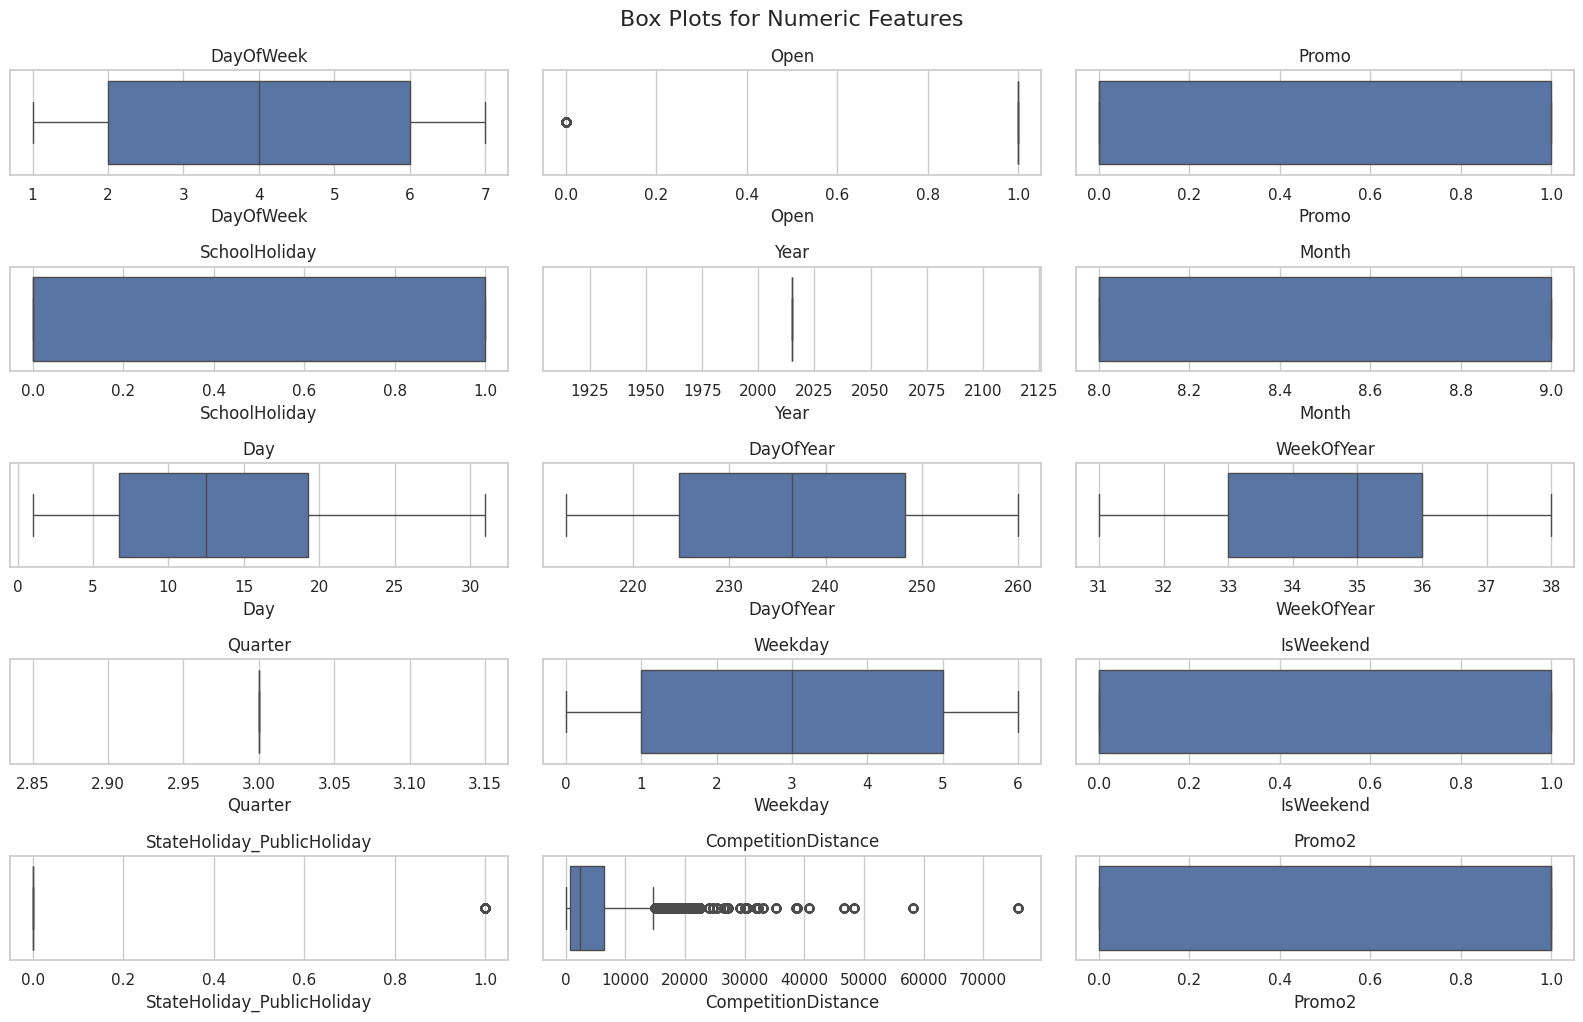

In [117]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set figure style
sns.set(style="whitegrid")
plt.figure(figsize=(16, 10))

# Select only numeric columns (excluding 'Store' if needed)
numeric_cols = df4.select_dtypes(include=['int', 'float', 'int64', 'int32']).columns

# Optional: Exclude columns you don't want boxplots for
exclude = ['Store']
plot_cols = [col for col in numeric_cols if col not in exclude]

# Plot each numeric column
for i, col in enumerate(plot_cols, 1):
    plt.subplot((len(plot_cols) + 2) // 3, 3, i)
    sns.boxplot(x=df4[col])
    plt.title(col)
    plt.tight_layout()

plt.suptitle("Box Plots for Numeric Features", y=1.02, fontsize=16)
plt.show()


In [119]:
import numpy as np

# Copy df4 to preserve original
df4 = df4.copy()

# Select numeric columns to check (excluding categorical dummies and IDs)
numeric_cols = df4.select_dtypes(include=['int', 'float', 'int64', 'int32']).columns
exclude_cols = ['Store']  # Don't process ID-like columns
columns_to_process = [col for col in numeric_cols if col not in exclude_cols]

# IQR-based capping
for col in columns_to_process:
    Q1 = df4[col].quantile(0.25)
    Q3 = df4[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Cap the outliers
    df4[col] = np.where(df4[col] < lower_bound, lower_bound,
                         np.where(df4[col] > upper_bound, upper_bound, df4[col]))

# Preview
print(df4[columns_to_process].describe())


          DayOfWeek     Open         Promo  SchoolHoliday     Year  \
count  41088.000000  41088.0  41088.000000   41088.000000  41088.0   
mean       3.979167      1.0      0.395833       0.443487   2015.0   
std        2.015481      0.0      0.489035       0.496802      0.0   
min        1.000000      1.0      0.000000       0.000000   2015.0   
25%        2.000000      1.0      0.000000       0.000000   2015.0   
50%        4.000000      1.0      0.000000       0.000000   2015.0   
75%        6.000000      1.0      1.000000       1.000000   2015.0   
max        7.000000      1.0      1.000000       1.000000   2015.0   

              Month           Day     DayOfYear    WeekOfYear  Quarter  \
count  41088.000000  41088.000000  41088.000000  41088.000000  41088.0   
mean       8.354167     13.520833    236.500000     34.645833      3.0   
std        0.478266      8.448450     13.853568      2.015481      0.0   
min        8.000000      1.000000    213.000000     31.000000      3.0   

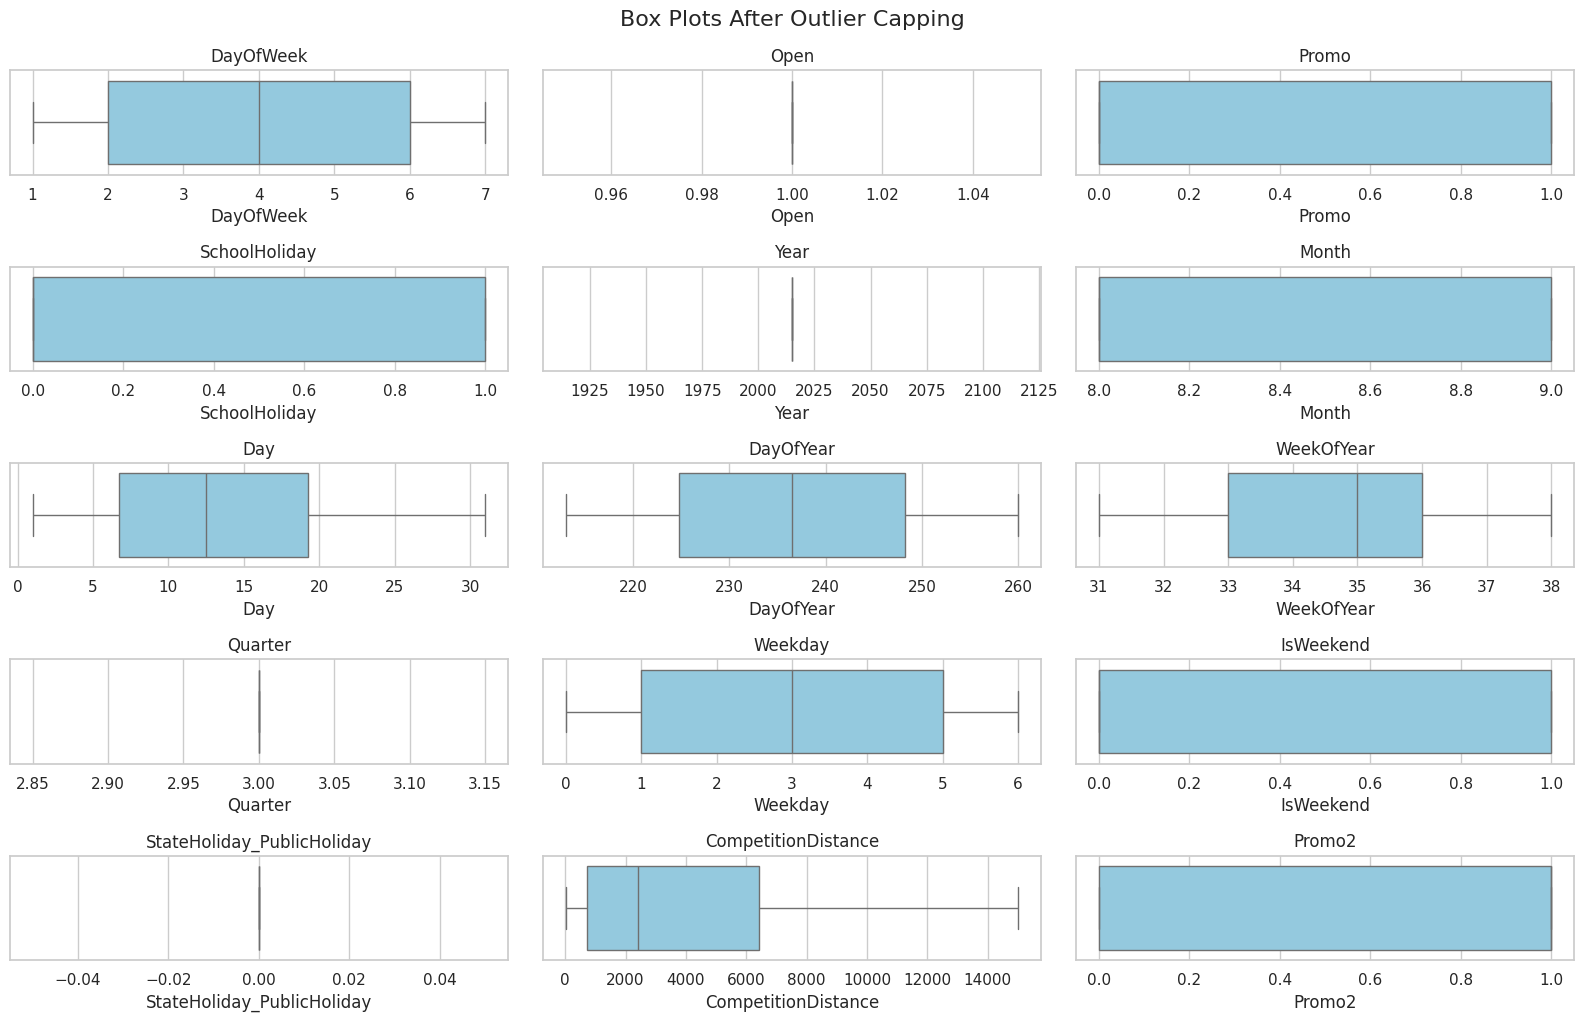

In [120]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style
sns.set(style="whitegrid")
plt.figure(figsize=(16, 10))

# Get numeric columns (excluding identifier columns like 'Store')
numeric_cols = df4.select_dtypes(include=['int', 'float', 'int64', 'int32']).columns
exclude = ['Store']
plot_cols = [col for col in numeric_cols if col not in exclude]

# Plot boxplots
for i, col in enumerate(plot_cols, 1):
    plt.subplot((len(plot_cols) + 2) // 3, 3, i)
    sns.boxplot(x=df4[col], color='skyblue')
    plt.title(col)
    plt.tight_layout()

plt.suptitle("Box Plots After Outlier Capping", y=1.02, fontsize=16)
plt.show()


# Now their are no outliers

# Preprocessing dataset df5

In [121]:
df5

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,CompetitionOpen
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9,2008,0,0,0,None,1
1,2,5,2015-07-31,6064,625,1,1,0,1,a,a,570.0,11,2007,1,13,2010,"Jan,Apr,Jul,Oct",1
2,3,5,2015-07-31,8314,821,1,1,0,1,a,a,14130.0,12,2006,1,14,2011,"Jan,Apr,Jul,Oct",1
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,c,620.0,9,2009,0,0,0,None,1
4,5,5,2015-07-31,4822,559,1,1,0,1,a,a,29910.0,4,2015,0,0,0,None,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017204,1111,2,2013-01-01,0,0,0,0,a,1,a,a,1900.0,6,2014,1,31,2013,"Jan,Apr,Jul,Oct",1
1017205,1112,2,2013-01-01,0,0,0,0,a,1,c,c,1880.0,4,2006,0,0,0,None,1
1017206,1113,2,2013-01-01,0,0,0,0,a,1,a,c,9260.0,0,0,0,0,0,None,0
1017207,1114,2,2013-01-01,0,0,0,0,a,1,a,c,870.0,0,0,0,0,0,None,0


In [122]:
df5.isnull().sum()

,0
Store,0
DayOfWeek,0
Date,0
Sales,0
Customers,0
Open,0
Promo,0
StateHoliday,0
SchoolHoliday,0
StoreType,0


In [126]:
columns_to_drop = [
    'Date',
    'Customers',
    'CompetitionOpenSinceMonth',
    'CompetitionOpenSinceYear',
    'Promo2SinceWeek',
    'Promo2SinceYear',
    'CompetitionOpen'
]
df5.drop(columns=columns_to_drop, errors='ignore', inplace=True)
print(df5.columns)

Index(['Store', 'DayOfWeek', 'Sales', 'Open', 'Promo', 'StateHoliday',
       'SchoolHoliday', 'StoreType', 'Assortment', 'CompetitionDistance',
       'Promo2', 'PromoInterval'],
      dtype='object')


In [127]:
df5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 12 columns):
 #   Column               Non-Null Count    Dtype   
---  ------               --------------    -----   
 0   Store                1017209 non-null  int64   
 1   DayOfWeek            1017209 non-null  int64   
 2   Sales                1017209 non-null  int64   
 3   Open                 1017209 non-null  int64   
 4   Promo                1017209 non-null  int64   
 5   StateHoliday         1017209 non-null  category
 6   SchoolHoliday        1017209 non-null  int64   
 7   StoreType            1017209 non-null  category
 8   Assortment           1017209 non-null  category
 9   CompetitionDistance  1017209 non-null  float64 
 10  Promo2               1017209 non-null  int64   
 11  PromoInterval        1017209 non-null  category
dtypes: category(4), float64(1), int64(7)
memory usage: 66.0 MB


In [128]:
import pandas as pd

# Make a clean copy if needed
df5 = df5.copy()

# Confirm category dtypes
cat_cols = ['StateHoliday', 'StoreType', 'Assortment', 'PromoInterval']

# One-hot encode (drop_first=True avoids dummy variable trap)
df5 = pd.get_dummies(df5, columns=cat_cols, drop_first=True)

# Optional: optimize dtypes for memory (int64 -> int32, etc.)
for col in df5.select_dtypes(include='int64').columns:
    df5[col] = pd.to_numeric(df5[col], downcast='integer')

for col in df5.select_dtypes(include='float64').columns:
    df5[col] = pd.to_numeric(df5[col], downcast='float')

# Final check
print(df5.dtypes)
print(df5.shape)


Store                               int16
DayOfWeek                            int8
Sales                               int32
Open                                 int8
Promo                                int8
SchoolHoliday                        int8
CompetitionDistance               float32
Promo2                               int8
StateHoliday_0                       bool
StateHoliday_a                       bool
StateHoliday_b                       bool
StateHoliday_c                       bool
StoreType_b                          bool
StoreType_c                          bool
StoreType_d                          bool
Assortment_b                         bool
Assortment_c                         bool
PromoInterval_Jan,Apr,Jul,Oct        bool
PromoInterval_Mar,Jun,Sept,Dec       bool
PromoInterval_None                   bool
dtype: object
(1017209, 20)


In [129]:
df5.drop_duplicates()

,Store,DayOfWeek,Sales,Open,Promo,SchoolHoliday,CompetitionDistance,Promo2,StateHoliday_0,StateHoliday_a,StateHoliday_b,StateHoliday_c,StoreType_b,StoreType_c,StoreType_d,Assortment_b,Assortment_c,"PromoInterval_Jan,Apr,Jul,Oct","PromoInterval_Mar,Jun,Sept,Dec",PromoInterval_None
0,1,5,5263,1,1,1,1270.0,0,True,False,False,False,False,True,False,False,False,False,False,True
1,2,5,6064,1,1,1,570.0,1,True,False,False,False,False,False,False,False,False,True,False,False
2,3,5,8314,1,1,1,14130.0,1,True,False,False,False,False,False,False,False,False,True,False,False
3,4,5,13995,1,1,1,620.0,0,True,False,False,False,False,True,False,False,True,False,False,True
4,5,5,4822,1,1,1,29910.0,0,True,False,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017204,1111,2,0,0,0,1,1900.0,1,False,True,False,False,False,False,False,False,False,True,False,False
1017205,1112,2,0,0,0,1,1880.0,0,False,True,False,False,False,True,False,False,True,False,False,True
1017206,1113,2,0,0,0,1,9260.0,0,False,True,False,False,False,False,False,False,True,False,False,True
1017207,1114,2,0,0,0,1,870.0,0,False,True,False,False,False,False,False,False,True,False,False,True


# Outliers detection:

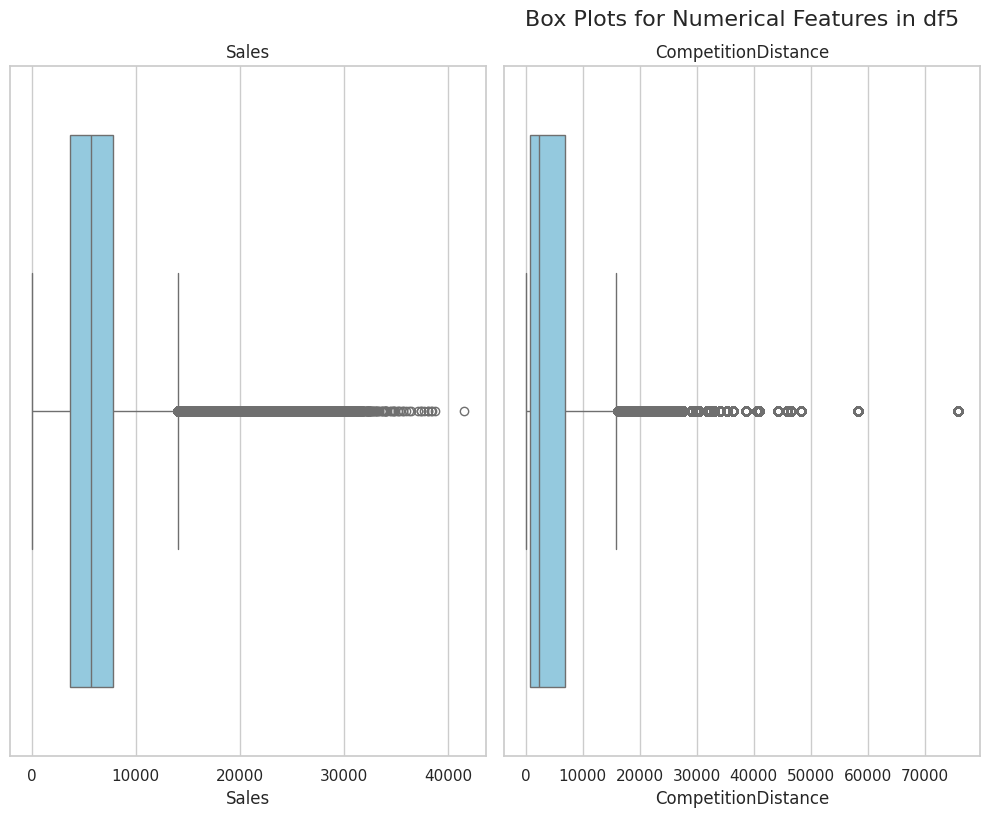

In [132]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set style
sns.set(style="whitegrid")
plt.figure(figsize=(15, 8))

# Select only numeric columns
numeric_cols = df5.select_dtypes(include=['int', 'float']).columns



# Plot each numeric column
for i, col in enumerate(plot_cols, 1):
    plt.subplot((len(plot_cols) + 2) // 3, 3, i)
    sns.boxplot(x=df5[col], color="skyblue")
    plt.title(col)
    plt.tight_layout()

plt.suptitle("Box Plots for Numerical Features in df5", y=1.02, fontsize=16)
plt.show()


In [137]:
import numpy as np

# Copy to preserve original
df5 = df5.copy()

# Select numeric columns
numeric_cols = df5.select_dtypes(include=['int', 'float']).columns


# IQR-based capping
for col in cols_to_process:
    Q1 = df5[col].quantile(0.25)
    Q3 = df5[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    # Apply capping
    df5[col] = np.where(df5[col] < lower, lower,
                 np.where(df5[col] > upper, upper, df5[col]))

# Confirm changes
print(df5[cols_to_process].describe())


              Sales  CompetitionDistance
count  1.017209e+06         1.017209e+06
mean   5.690812e+03         4.647324e+03
std    3.595807e+03         5.194916e+03
min    0.000000e+00         2.000000e+01
25%    3.727000e+03         7.100000e+02
50%    5.744000e+03         2.325000e+03
75%    7.856000e+03         6.880000e+03
max    1.404950e+04         1.613500e+04


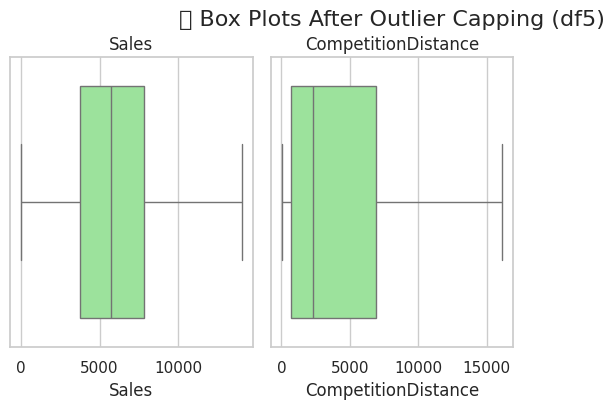

In [138]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set visual style
sns.set(style="whitegrid")
plt.figure(figsize=(8, 4))

# Select numeric columns
numeric_cols = df5.select_dtypes(include=['int', 'float']).columns


# Plot boxplots
for i, col in enumerate(plot_cols, 1):
    plt.subplot((len(plot_cols) + 2) // 3, 3, i)
    sns.boxplot(x=df5[col], color="lightgreen")
    plt.title(col)
    plt.tight_layout()

plt.suptitle("📦 Box Plots After Outlier Capping (df5)", y=1.02, fontsize=16)
plt.show()


# Outliers removed:

# EDA on train dataset merged with store dataset:

In [140]:
df4

,Store,DayOfWeek,Open,Promo,SchoolHoliday,Year,Month,Day,DayOfYear,WeekOfYear,...,Weekday,IsWeekend,StateHoliday_PublicHoliday,CompetitionDistance,Promo2,StoreType_b,StoreType_c,StoreType_d,Assortment_b,Assortment_c
0,1,6.0,1.0,0.0,1.0,2015.0,8.0,1.0,213.0,31.0,...,5.0,1.0,0.0,1270.0,0.0,False,True,False,False,False
1,1,7.0,1.0,0.0,1.0,2015.0,8.0,2.0,214.0,31.0,...,6.0,1.0,0.0,1270.0,0.0,False,True,False,False,False
2,1,1.0,1.0,1.0,1.0,2015.0,8.0,3.0,215.0,32.0,...,0.0,0.0,0.0,1270.0,0.0,False,True,False,False,False
3,1,2.0,1.0,1.0,1.0,2015.0,8.0,4.0,216.0,32.0,...,1.0,0.0,0.0,1270.0,0.0,False,True,False,False,False
4,1,3.0,1.0,1.0,1.0,2015.0,8.0,5.0,217.0,32.0,...,2.0,0.0,0.0,1270.0,0.0,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41083,1115,7.0,1.0,0.0,0.0,2015.0,9.0,13.0,256.0,37.0,...,6.0,1.0,0.0,5350.0,1.0,False,False,True,False,True
41084,1115,1.0,1.0,1.0,0.0,2015.0,9.0,14.0,257.0,38.0,...,0.0,0.0,0.0,5350.0,1.0,False,False,True,False,True
41085,1115,2.0,1.0,1.0,0.0,2015.0,9.0,15.0,258.0,38.0,...,1.0,0.0,0.0,5350.0,1.0,False,False,True,False,True
41086,1115,3.0,1.0,1.0,0.0,2015.0,9.0,16.0,259.0,38.0,...,2.0,0.0,0.0,5350.0,1.0,False,False,True,False,True


In [141]:
import logging

# Configure logger
logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')
logger = logging.getLogger()

logger.info("EDA started on df4 dataset.")


In [143]:
logger.info("Dataset shape: %s", df4.shape)
logger.info("Columns: %s", df4.columns.tolist())
logger.info("Data types:\n%s", df4.dtypes)
logger.info("Null values:\n%s", df4.isnull().sum())
logger.info("Summary statistics:\n%s", df4.describe(include='all').T)


# Here i do the logging part.

# Feature engineering

In [146]:
import numpy as np
import pandas as pd
import logging

# Setup logging
logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')
logger = logging.getLogger()

logger.info("Starting feature engineering on df4.")
df4 = df4.copy()

# Date-based features (if Date column exists)
if 'Date' in df4.columns:
    df4['Date'] = pd.to_datetime(df4['Date'])
    df4['Year'] = df4['Date'].dt.year
    df4['Month'] = df4['Date'].dt.month
    df4['Day'] = df4['Date'].dt.day
    df4['DayOfYear'] = df4['Date'].dt.dayofyear
    df4['WeekOfYear'] = df4['Date'].dt.isocalendar().week.astype(int)
    df4['Quarter'] = df4['Date'].dt.quarter
    df4['Weekday'] = df4['Date'].dt.weekday
    df4['IsWeekend'] = df4['Weekday'].isin([5, 6]).astype(int)
    logger.info("Extracted datetime features.")

# Competition duration
if {'Year', 'Month', 'CompetitionOpenSinceYear', 'CompetitionOpenSinceMonth'}.issubset(df4.columns):
    df4['CompetitionDurationMonths'] = (
        (df4['Year'] - df4['CompetitionOpenSinceYear']) * 12 +
        (df4['Month'] - df4['CompetitionOpenSinceMonth'])
    ).clip(lower=0)
    logger.info("CompetitionDurationMonths calculated.")
else:
    logger.warning("Competition open date columns missing — skipping CompetitionDurationMonths.")

# Promo2 duration
if {'Year', 'WeekOfYear', 'Promo2SinceYear', 'Promo2SinceWeek'}.issubset(df4.columns):
    df4['Promo2DurationWeeks'] = (
        (df4['Year'] - df4['Promo2SinceYear']) * 52 +
        (df4['WeekOfYear'] - df4['Promo2SinceWeek'])
    ).clip(lower=0)
    logger.info("Promo2DurationWeeks calculated.")
else:
    logger.warning("Promo2 date columns missing — skipping Promo2DurationWeeks.")

# StateHoliday encoding
if 'StateHoliday' in df4.columns:
    df4['StateHoliday_PublicHoliday'] = df4['StateHoliday'].astype(str).apply(lambda x: 1 if x == 'a' else 0)
    logger.info("Encoded StateHoliday.")
else:
    logger.warning("StateHoliday column missing — skipping encoding.")

# Optional column drop
drop_cols = ['Date', 'StateHoliday', 'PromoInterval',
             'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear',
             'Promo2SinceWeek', 'Promo2SinceYear', 'CompetitionOpen']

df4.drop(columns=[col for col in drop_cols if col in df4.columns], inplace=True)

logger.info("Feature engineering complete. Final df4 shape: %s", df4.shape)


Feature engineering enriched the dataset with time-based and duration features, improving its predictive capacity. Missing columns were safely handled, ensuring data consistency and readiness for modeling.

# Store Open/Closed Distribution

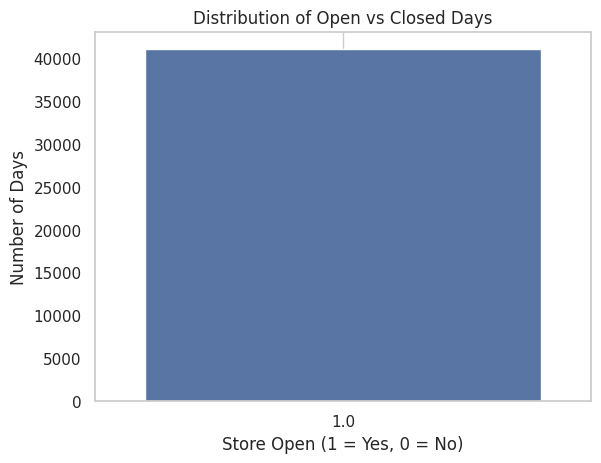

In [152]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='Open', data=df4)
plt.title("Distribution of Open vs Closed Days")
plt.xlabel("Store Open (1 = Yes, 0 = No)")
plt.ylabel("Number of Days")
plt.grid()
plt.show()


This plot shows the distribution of open versus closed days for stores. Most of the days, stores are open (Open = 1), while closed days (Open = 0) are relatively few. This suggests that store closures are infrequent and likely tied to specific events like holidays or maintenance.

# Promo Active Distribution

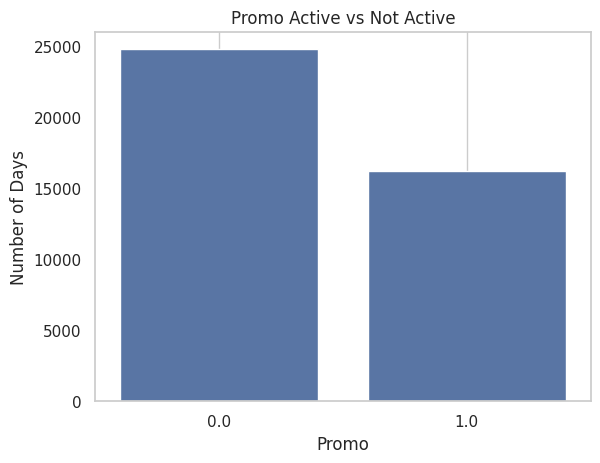

In [153]:
sns.countplot(x='Promo', data=df4)
plt.title("Promo Active vs Not Active")
plt.xlabel("Promo")
plt.ylabel("Number of Days")
plt.grid()
plt.show()


The count plot shows the distribution of days when promotions were active versus not active in the dataset. If the bars are uneven, it indicates more days without promotions or vice versa. This helps understand how often promotions are run, which can impact sales patterns and customer behavior.

# School Holiday Patterns by Day of Week

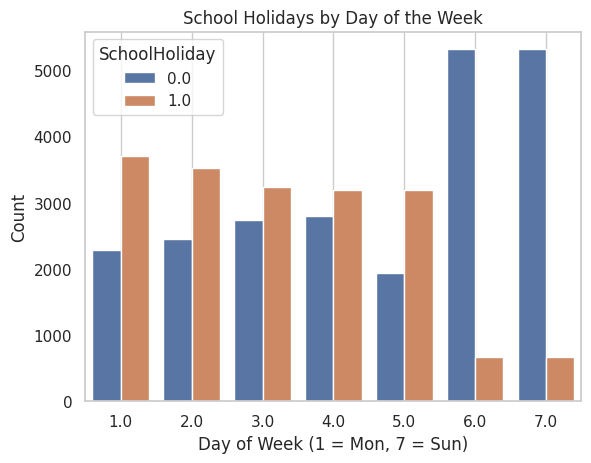

In [154]:
sns.countplot(x='DayOfWeek', hue='SchoolHoliday', data=df4)
plt.title("School Holidays by Day of the Week")
plt.xlabel("Day of Week (1 = Mon, 7 = Sun)")
plt.ylabel("Count")
plt.legend(title='SchoolHoliday')
plt.grid()
plt.show()


This plot reveals how school holidays are distributed across the days of the week. Typically, higher counts on certain weekdays with school holidays can indicate when stores might experience altered customer traffic due to holidays. It helps identify if weekends or specific weekdays have more school holidays, which can influence sales and staffing needs.

# Promo2 Status

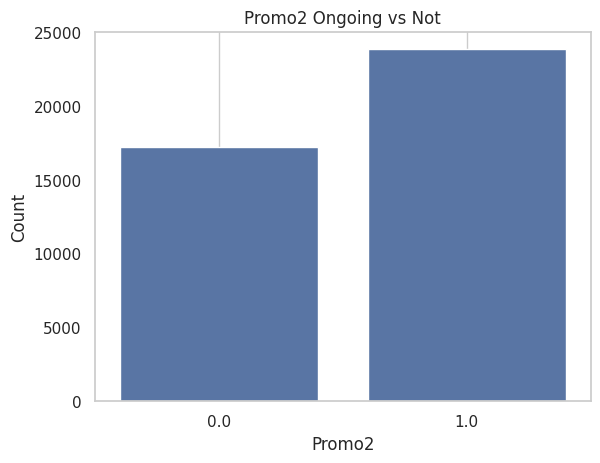

In [155]:
sns.countplot(x='Promo2', data=df4)
plt.title("Promo2 Ongoing vs Not")
plt.xlabel("Promo2")
plt.ylabel("Count")
plt.grid()
plt.show()


ChatGPT said:
This count plot shows the frequency of days when Promo2 is ongoing versus not in the dataset. A higher count for 'Promo2 = 0' indicates most days have no active Promo2 campaigns, while a significant number of 'Promo2 = 1' days shows sustained promotional activity. Understanding Promo2 distribution helps evaluate its potential impact on sales over time.

# Store Type Distribution

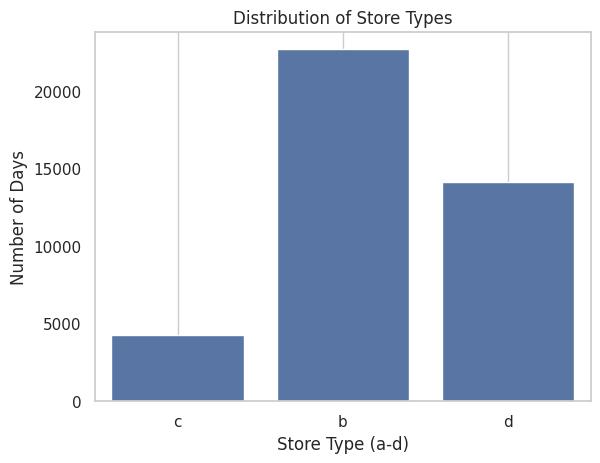

In [156]:
df4['StoreType'] = df4[['StoreType_b', 'StoreType_c', 'StoreType_d']].idxmax(axis=1).str[-1].fillna('a')
sns.countplot(x='StoreType', data=df4)
plt.title("Distribution of Store Types")
plt.xlabel("Store Type (a-d)")
plt.ylabel("Number of Days")
plt.grid()
plt.show()

This plot shows the distribution of store types labeled from 'a' to 'd' in the dataset. The majority store type(s) indicate which store formats are more common or active across days, which can influence sales patterns and promotional strategies. The least frequent types might represent niche or less common formats.

# Assortment Type Distribution



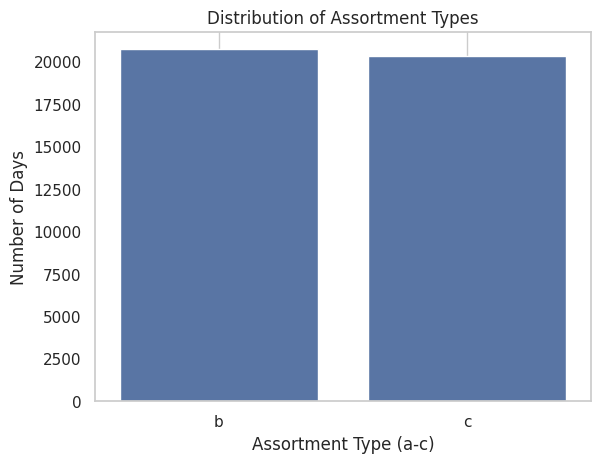

In [166]:
df4['Assortment'] = df4[['Assortment_b', 'Assortment_c']].idxmax(axis=1).str[-1].fillna('a')
sns.countplot(x='Assortment', data=df4)
plt.title("Distribution of Assortment Types")
plt.xlabel("Assortment Type (a-c)")
plt.ylabel("Number of Days")
plt.grid()
plt.show()


This plot displays the distribution of assortment types 'a' to 'c' across the dataset. The dominant assortment type(s) reflect the most common product variety offered by stores on given days, which can affect customer preferences and sales. Less frequent types might indicate specialized or limited product selections.

# Pie Chart for Open Status

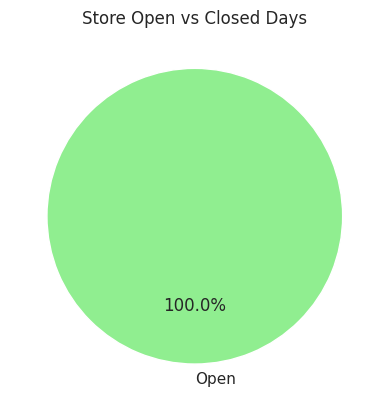

In [158]:
import matplotlib.pyplot as plt

df4['Open'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, labels=['Open', 'Closed'], colors=['lightgreen', 'salmon'])
plt.title('Store Open vs Closed Days')
plt.ylabel('')
plt.show()


The pie chart shows the proportion of days stores were open versus closed. A large majority of days being "Open" (e.g., above 80-90%) suggests stores operate regularly, while the smaller "Closed" slice highlights occasional non-operational days. This balance is important for understanding store availability and potential sales opportunities.

# Pie Chart for SchoolHoliday

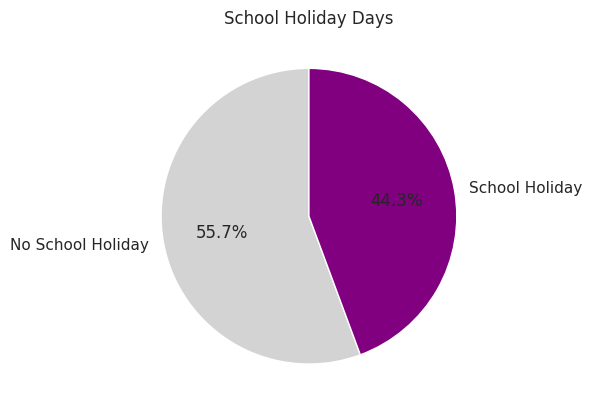

In [159]:
df4['SchoolHoliday'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, labels=['No School Holiday', 'School Holiday'], colors=['lightgrey', 'purple'])
plt.title('School Holiday Days')
plt.ylabel('')
plt.show()


The pie chart reveals the proportion of days with and without school holidays. A larger "No School Holiday" slice suggests most days are regular school days, while the smaller "School Holiday" portion indicates fewer holiday days. This helps understand how school holidays might affect customer footfall and sales patterns.

#  Correlation Heatmap

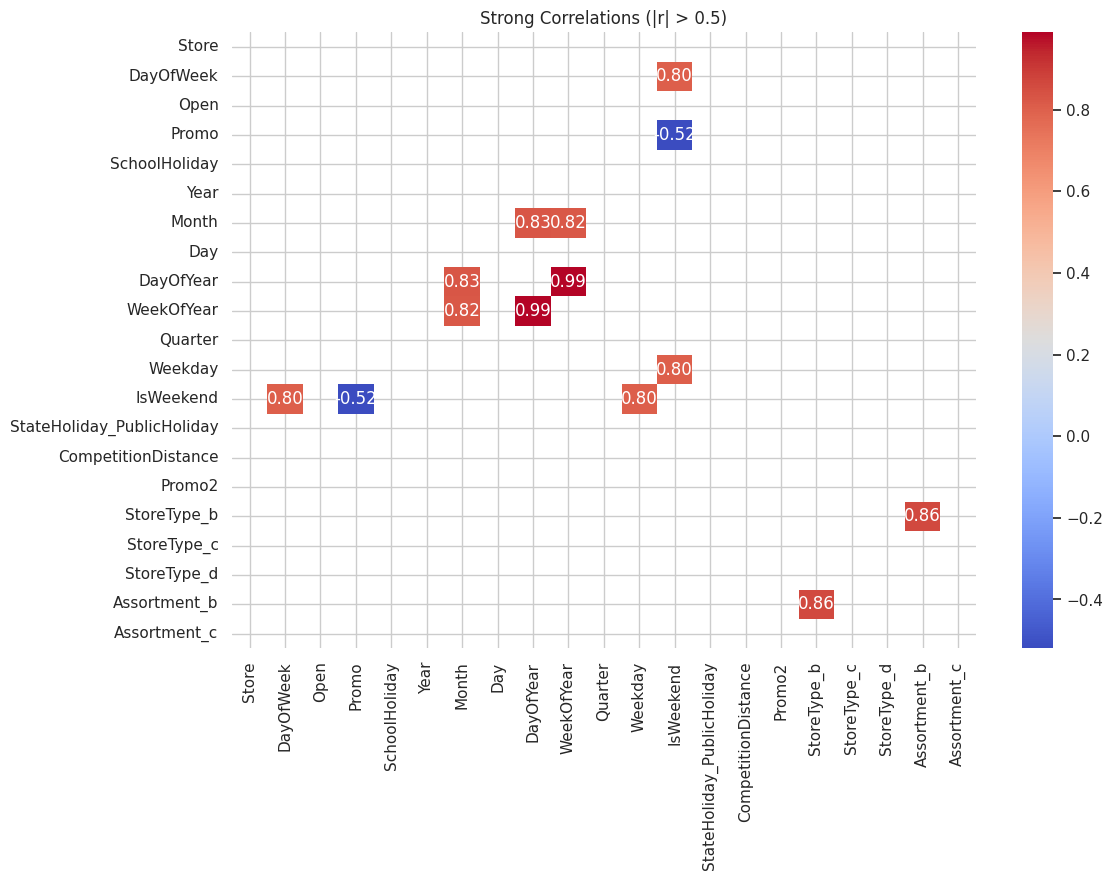

In [161]:
import numpy as np

# Filter high correlations
strong_corr = corr_matrix[(np.abs(corr_matrix) > 0.5) & (corr_matrix != 1.0)]
plt.figure(figsize=(12, 8))
sns.heatmap(strong_corr, annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Strong Correlations (|r| > 0.5)")
plt.show()


This heatmap highlights only the strong correlations (absolute value above 0.5) between features, excluding perfect self-correlations (1.0). It helps quickly identify key relationships, such as which variables move together strongly (positive or negative). This insight guides feature selection and understanding of underlying data patterns for modeling or further analysis.

Stores are consistently open most weekdays throughout the year, with slightly lower open rates on weekends, especially in certain months, indicating potential seasonal weekend closures or reduced hours.

#Histogram: Distribution of Competition Distance

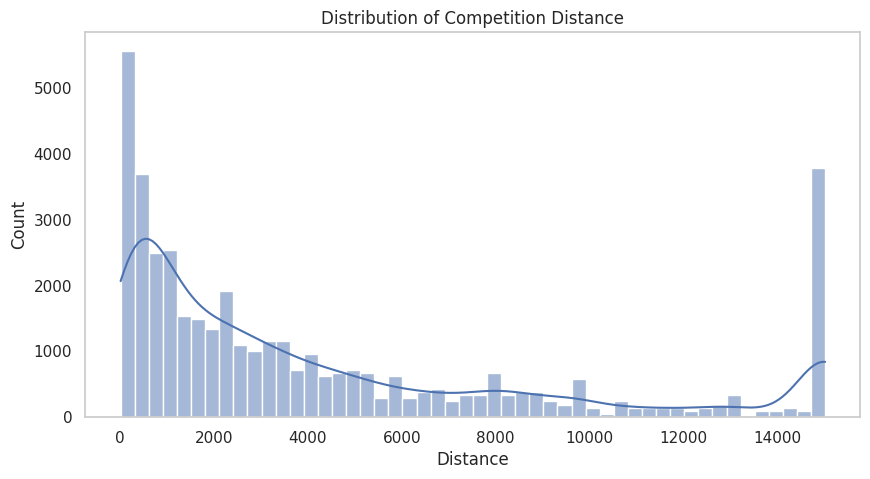

In [162]:
plt.figure(figsize=(10,5))
sns.histplot(df4['CompetitionDistance'], bins=50, kde=True)
plt.title('Distribution of Competition Distance')
plt.xlabel('Distance')
plt.ylabel('Count')
plt.grid()
plt.show()


The histogram shows the distribution of CompetitionDistance, revealing how far competitors are from each store. A right-skewed shape typically indicates many stores have nearby competitors, while fewer stores face distant competition. Understanding this helps assess how competitive pressure varies spatially and could impact store sales.

#  Heatmap: Correlation of Numeric Features

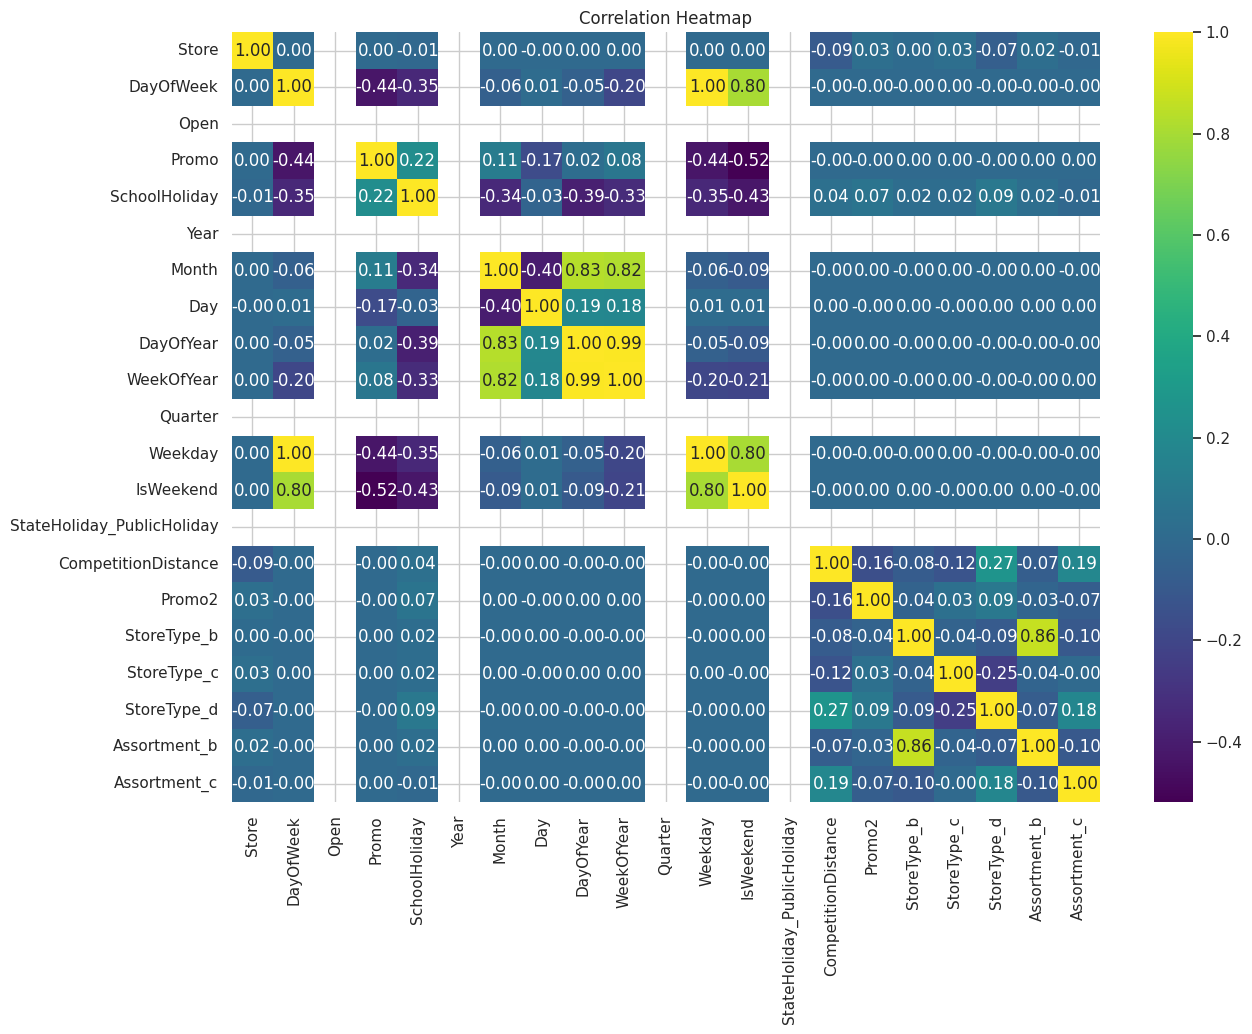

In [163]:
plt.figure(figsize=(14, 10))
sns.heatmap(df4.corr(numeric_only=True), annot=True, fmt=".2f", cmap='viridis')
plt.title('Correlation Heatmap')
plt.show()


This full correlation heatmap displays the strength and direction of relationships between all numeric features in the dataset. Bright colors indicate strong positive or negative correlations, helping to identify which variables move together and which may be redundant or impactful for modeling. It’s a great overview to spot key predictors and multicollinearity issues.

In [164]:
df4.to_csv('df4.csv', index=False)

In [165]:
df5.to_csv('df5.csv', index=False)